In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

* **(Weather Prediction) using neural network**

In [53]:
df = pd.read_csv('Input\weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [54]:
df = df[['Formatted Date', 'Temperature (C)']]
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], yearfirst=True)
df['Short Date'] = df['Formatted Date'].map(lambda date:f'{date.year}-{date.month}-{date.day}')
df = df.sort_values(by=['Formatted Date'], ascending=True).reset_index(drop=True)
df.head(-10)

C:\Users\Royal Center\AppData\Local\Temp\ipykernel_892\3714411680.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], yearfirst=True)


,Formatted Date,Temperature (C),Short Date
0,2006-01-01 00:00:00+01:00,0.577778,2006-1-1
1,2006-01-01 01:00:00+01:00,1.161111,2006-1-1
2,2006-01-01 02:00:00+01:00,1.666667,2006-1-1
3,2006-01-01 03:00:00+01:00,1.711111,2006-1-1
4,2006-01-01 04:00:00+01:00,1.183333,2006-1-1
...,...,...,...
96438,2016-12-31 09:00:00+01:00,-0.194444,2016-12-31
96439,2016-12-31 10:00:00+01:00,0.705556,2016-12-31
96440,2016-12-31 11:00:00+01:00,1.550000,2016-12-31
96441,2016-12-31 12:00:00+01:00,2.222222,2016-12-31


In [55]:
data = df.groupby(['Short Date'])['Temperature (C)'].mean().reset_index()
data['Date'] = pd.to_datetime(data['Short Date'], yearfirst=True)
data =data.sort_values(by=['Date'], ascending=True).reset_index(drop=True)
data['Day_of_Year'] = pd.to_datetime(data['Date']).dt.dayofyear
data.head(-10)

,Short Date,Temperature (C),Date,Day_of_Year
0,2006-1-1,3.873148,2006-01-01,1
1,2006-1-2,5.418519,2006-01-02,2
2,2006-1-3,2.319444,2006-01-03,3
3,2006-1-4,2.274074,2006-01-04,4
4,2006-1-5,2.698148,2006-01-05,5
...,...,...,...,...
4003,2016-12-17,1.027546,2016-12-17,352
4004,2016-12-18,0.938657,2016-12-18,353
4005,2016-12-19,0.853009,2016-12-19,354
4006,2016-12-20,0.769907,2016-12-20,355


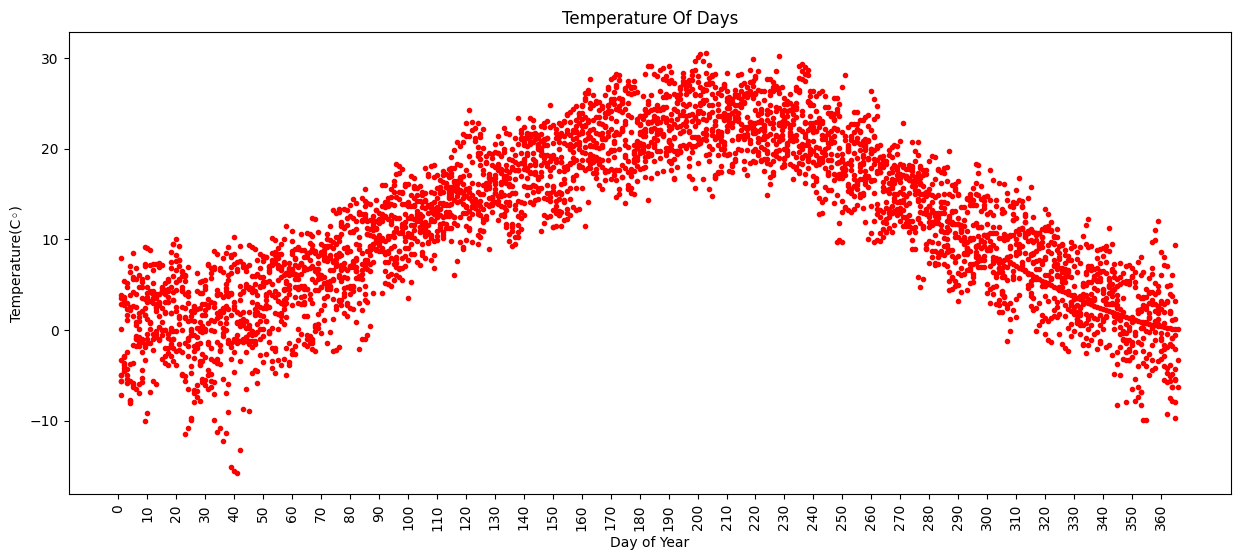

In [56]:
plt.figure(figsize=(15, 6))
plt.scatter(data['Day_of_Year'], data['Temperature (C)'], marker='.',color='red')
plt.title('Temperature Of Days')
plt.xlabel('Day of Year')
plt.ylabel('Temperature(C◦)')
plt.xticks(np.arange(0, 365, 10), rotation='vertical')
plt.show()


In [57]:
X = data[['Day_of_Year']].copy().to_numpy(int)
Y = data[['Temperature (C)']].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape,

((3214, 1), (804, 1), (3214, 1), (804, 1))

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(72, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(36, activation='relu'),
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
    ])

c:\Users\Royal Center\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'mse')

In [60]:
output = model.fit(X_train, Y_train, epochs=70)

Epoch 1/70


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 174.4382
Epoch 2/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.2374
Epoch 3/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51.5764
Epoch 4/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.8800
Epoch 5/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.3703
Epoch 6/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.5729
Epoch 7/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.1361
Epoch 8/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.7161
Epoch 9/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48.9204
Epoch 10/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.8943
Epoch 11/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.1394
Epoch 12/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.7182
Epoch 13/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.6039
Epoch 14/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.2995
Epoch 15/70
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

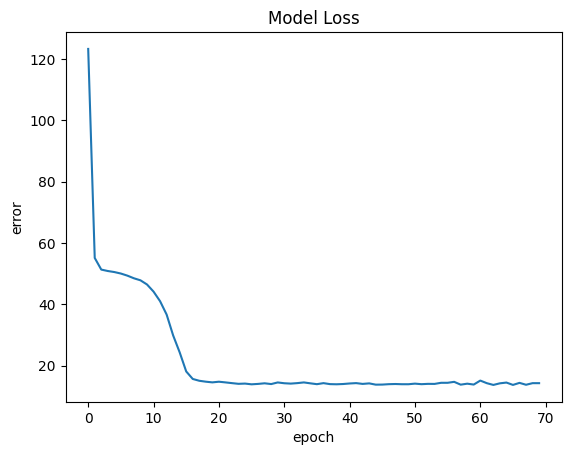

In [61]:
plt.plot(output.history['loss'])
plt.title("Model Loss")
plt.xlabel("epoch")
plt.ylabel("error")
plt.show()

In [62]:
loss = model.evaluate(X_test, Y_test) 
loss 

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.7758  


14.301847457885742


* **Plot Regression Line on Data**


In [63]:
Y_pred = model.predict(X_test).reshape(-1, 1)
Y_pred.shape, X_test.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


((804, 1), (804, 1))

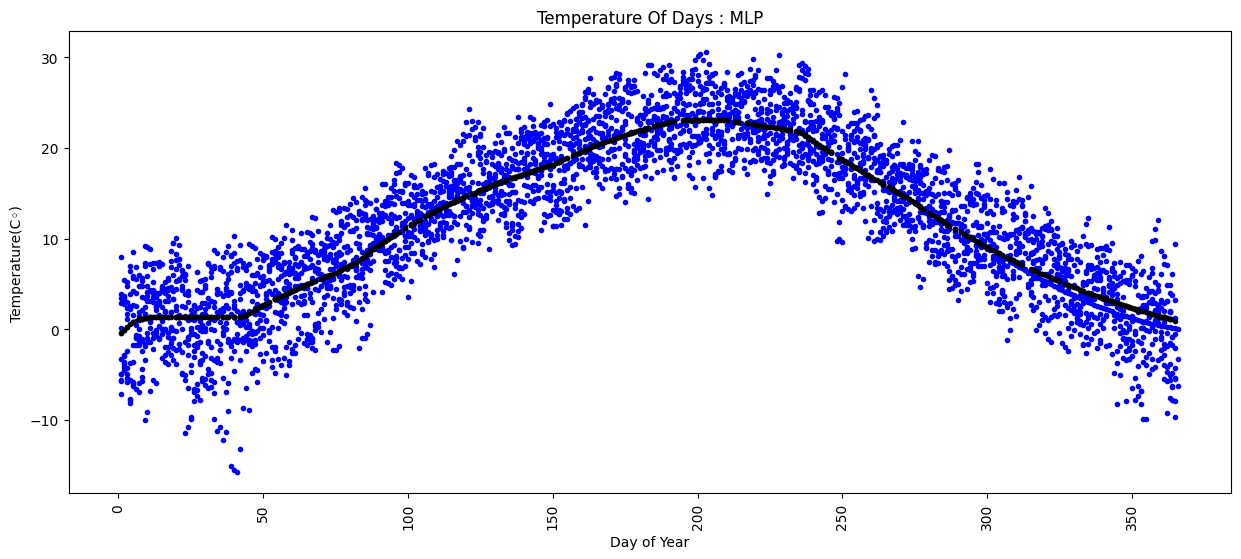

In [64]:
plt.figure(figsize=(15, 6))
plt.scatter(data['Day_of_Year'], data['Temperature (C)'], marker='.',color='blue')
plt.plot(X_test, Y_pred, '.', c='black')
plt.title('Temperature Of Days : MLP')
plt.xlabel('Day of Year')
plt.ylabel('Temperature(C◦)')
plt.xticks(np.arange(0, 365, 50), rotation='vertical')
plt.show()

* **Compare results**

In [65]:
from perceptron import Perceptron

In [66]:
model_ol = Perceptron(input_length=X_train.shape[1], learning_rate=0.00001, type_of_data='regression',function='linear')
model_ol.fit(X_train, X_test, Y_train, Y_test, epochs=200)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:11<00:00, 17.83it/s]


In [67]:
loss_ol, _ = model_ol.evaluate(X_test, Y_test)

In [68]:
print('Multi Layer Perceptron Model Loss:', loss)
print('Single(One) Layer Perceptron Model loss:', loss_ol)

Multi Layer Perceptron Model Loss: 14.301847457885742
Single(One) Layer Perceptron Model loss: 79.14943050104955
